In [1]:
import os
import pandas as pd
import numpy as np
from omnixai.data.tabular import Tabular
from omnixai.explainers.tabular import TabularExplainer
from omnixai.explainers.data import DataAnalyzer
import seaborn as sns
from omnixai.visualization.dashboard import Dashboard
import matplotlib.pyplot as plt

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
train_complete = pd.read_csv('../data_format1/use_data/merged_df.csv')
train_complete.shape

(385, 182)

In [42]:
# Constant drop method 1
df1 = train_complete.loc[:, (train_complete != train_complete.iloc[0]).any()] 
df1.shape

(385, 168)

In [48]:
# constant drop method 2
from sklearn.feature_selection import VarianceThreshold

df2 = train_complete.drop('label', axis='columns')
sel = VarianceThreshold(threshold=0)
sel.fit(df2)
sum(sel.get_support()) 

[print(x) for x in df2.columns if x not in df2.columns[sel.get_support()]]
df2 = sel.transform(df2)

product diversity
merchant product diversity
merchant_unknown_buy_count
merchant_unknown_buy_ratio
merchant_ageGroup_1_counts
brand_unknown_buy_count
brand_unknown_buy_ratio
brand_ageGroup_1_counts
item_unknown_buy_count
item_unknown_buy_ratio
item_ageGroup_1_counts
cat_unknown_buy_count
cat_unknown_buy_ratio
cat_ageGroup_1_counts


In [49]:
df2.shape

(385, 167)

In [78]:
df2 = train_complete
sel = VarianceThreshold(threshold=0.01) 
sel.fit(df2)
sum(sel.get_support())
dropped = [x for x in df2.columns if x not in df2.columns[sel.get_support()]]


In [79]:
#train = sel.transform(df2)
for x in dropped:
    df2.drop(x, axis=1, inplace=True)
df2.shape

(385, 156)

In [80]:
df2.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label,...,cat_male_buy_ratio,cat_female_buy_ratio,cat_ageGroup_2_counts,cat_ageGroup_3_counts,cat_ageGroup_4_counts,cat_ageGroup_5_counts,cat_ageGroup_6_counts,cat_ageGroup_7_counts,cat_ageGroup_8_counts,cat_ageGroup_0_counts
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8


In [81]:
# consider removing label column from feature columns
tabular_data = Tabular(
    df2,
    feature_columns=list(df2.columns).remove('label'),
    target_column='label'
)

In [82]:
explainer = DataAnalyzer(
    explainers=["correlation", "mutual","chi2"],
    mode="classification",
    data=tabular_data
)

there are constants, initial ones should that should be dropped

In [37]:
df2.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,label,...,cat_male_buy_ratio,cat_female_buy_ratio,cat_ageGroup_2_counts,cat_ageGroup_3_counts,cat_ageGroup_4_counts,cat_ageGroup_5_counts,cat_ageGroup_6_counts,cat_ageGroup_7_counts,cat_ageGroup_8_counts,cat_ageGroup_0_counts
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,0,...,0.2,0.8,2,1,10,7,8,0,0,8


In [83]:
explanations = explainer.explain_global(
    params={"correlation": {"features": list(train_complete.columns).remove('label')}
            }
)

In [84]:
print("Correlation:")
explanations["correlation"].ipython_plot()

Correlation:


<AxesSubplot:>

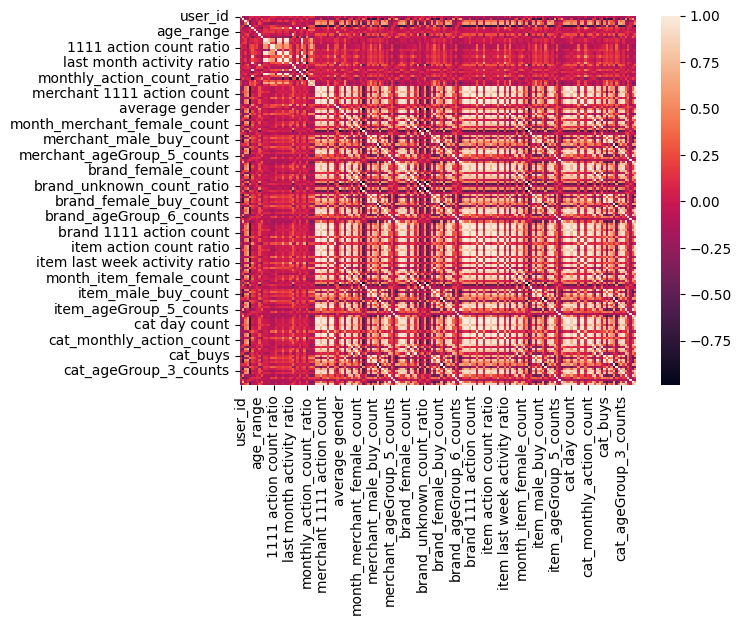

In [25]:
sns.heatmap(df2.corr())

In [85]:
print("Mutual information:")
explanations["mutual"].ipython_plot()
print("Chi square:")
explanations["chi2"].ipython_plot()

Mutual information:


Chi square:


In [154]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=25).fit(df2, df2['label'])
X_new.get_feature_names_out()[:]

array(['user_id', 'item_id', 'seller_id', 'time_stamp', 'label',
       'month_total_action_count', 'month_merchant_male_count',
       'merchant_buys', 'merchant_ageGroup_2_counts',
       'merchant_ageGroup_3_counts', 'merchant_ageGroup_5_counts',
       'month_brand_male_count', 'brand_buys', 'brand_ageGroup_2_counts',
       'brand_ageGroup_5_counts', 'item_female_count',
       'month_item_male_count', 'item_ageGroup_2_counts',
       'item_ageGroup_3_counts', 'item_ageGroup_5_counts',
       'month_cat_male_count', 'cat_buys', 'cat_ageGroup_2_counts',
       'cat_ageGroup_3_counts', 'cat_ageGroup_5_counts'], dtype=object)

In [106]:
from sklearn.feature_selection import SelectPercentile, chi2

XX_new = SelectPercentile(chi2, percentile=10).fit(df2.drop('label', axis=1), df2['label'])
XX_new.get_feature_names_out()

array(['user_id', 'item_id', 'seller_id', 'time_stamp',
       'month_total_action_count', 'month_merchant_male_count',
       'merchant_ageGroup_2_counts', 'merchant_ageGroup_5_counts',
       'month_brand_male_count', 'brand_ageGroup_2_counts',
       'brand_ageGroup_5_counts', 'item_ageGroup_2_counts',
       'item_ageGroup_5_counts', 'month_cat_male_count',
       'cat_ageGroup_2_counts', 'cat_ageGroup_5_counts'], dtype=object)

In [155]:
df_25 = df2.filter(X_new.get_feature_names_out())


In [114]:
df_50 = df2.filter(X_new.get_feature_names_out())


In [115]:
# consider removing label column from feature columns
tabular_data = Tabular(
    df_50,
    feature_columns=list(df2.columns).remove('label'),
    target_column='label'
)

In [122]:
explainer = DataAnalyzer(
    explainers=["correlation", "mutual","chi2"],
    mode="classification",
    data=tabular_data
)
explanations = explainer.explain_global(
    params={"correlation": {"features": list(df_50.columns).remove('label')}
            }
)

<AxesSubplot:>

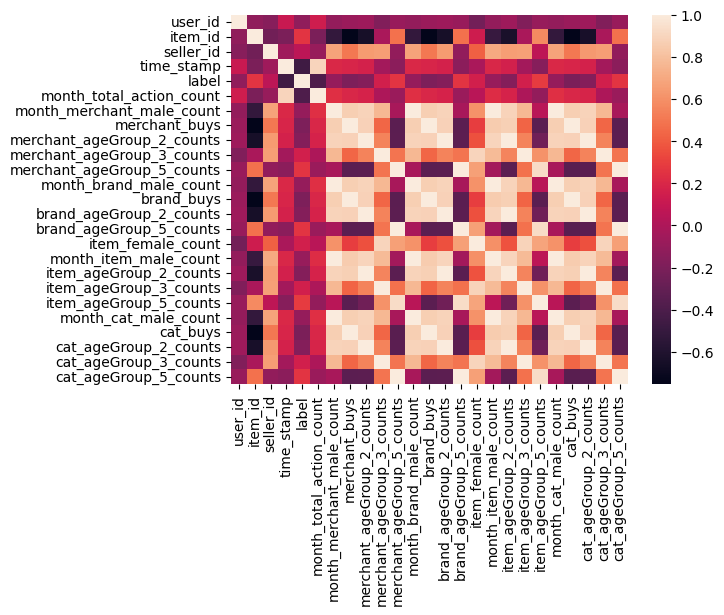

In [156]:
sns.heatmap(df_25.corr())

In [126]:
print("Mutual information:")
explanations["mutual"].ipython_plot()
print("Chi square:")
explanations["chi2"].ipython_plot()

Mutual information:


Chi square:


In [144]:
import xgboost
from omnixai.preprocessing.tabular import TabularTransform
import sklearn

label = list(df_50['label'])
dataset = df_50.drop('label', axis='columns')

tabular_data2 = Tabular(
    dataset,
    feature_columns=list(dataset.columns),
    #target_column='label'
    
)

transformer = TabularTransform().fit(tabular_data2)
x = transformer.transform(tabular_data2)

gbtree = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
gbtree.fit(x, label)

train_data = transformer.invert(x)

In [145]:
class_names = transformer.class_names

explainer = TabularExplainer(
  explainers=["shap"], # The explainers to apply
  mode="classification",                             # The task type
  data=train_data,                                   # The data for initializing the explainers                                            
  model=gbtree,
  preprocess=lambda z: transformer.transform(z),
  params={ "shap": {"nsamples": 100},},
)

In [130]:
global_explanations = explainer.explain_global()
global_explanations["shap"].ipython_plot(class_names=class_names)

KeyError: 'shap'

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in versi

SHAP results:


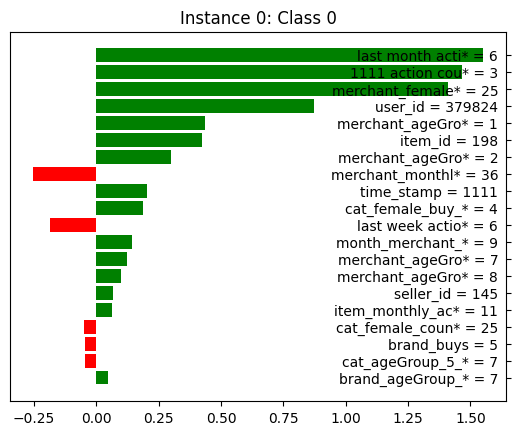

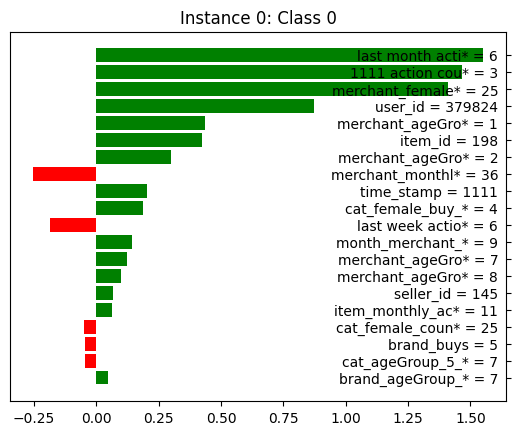

In [136]:
test_instances = train_data[0:10]
local_explanations = explainer.explain(X=test_instances)
index = 0
print("SHAP results:")
local_explanations["shap"].plot(index, class_names=class_names)

In [146]:
test_instances = train_data[0:10]
local_explanations = explainer.explain(X=test_instances)
index = 0
print("SHAP results:")
local_explanations["shap"].ipython_plot(index, class_names=class_names)

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in versi

SHAP results:


In [142]:
chosen = ['last month action', '1111 action count', 'merchant_female', 'user_id', 'merchant+']

0


In [137]:
# shap new way
import shap

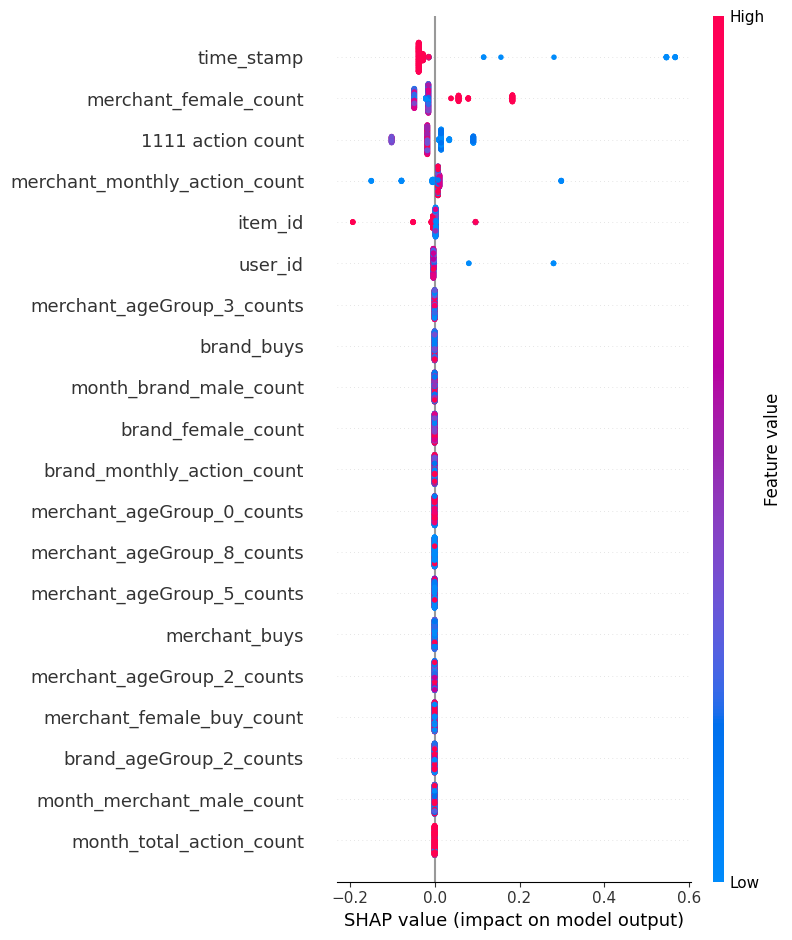

In [139]:
Xd = xgboost.DMatrix(dataset, label=label)
model = xgboost.train({
    'eta':1, 'max_depth':3, 'base_score': 0, "lambda": 0
}, Xd, 1)
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()
shap.summary_plot(shap_values, dataset)



In [158]:
df_50 = df_50.drop(['merchant_monthly_action_count', 'last week action count', 'cat_female_count', 'brand_buys', 'cat_ageGroup_5_counts'], axis=1)

In [160]:
df_50.shape
df_50.to_csv('df_50.csv', index=False)